> ### 📢 <span style="color:yellow;background-color:red;">본 코드는 작성자의 브라우저인 Firefox로 작성되었습니다.</span>
> Code Automation에서 driver를 생성하는 부분, driver를 지정하는 부분을 꼭 수정하시고 실행하시기 바랍니다.<br><br>

## Code Automation

Youtube 홈 메인에 있는 영상들의 데이터를 가져옵니다.

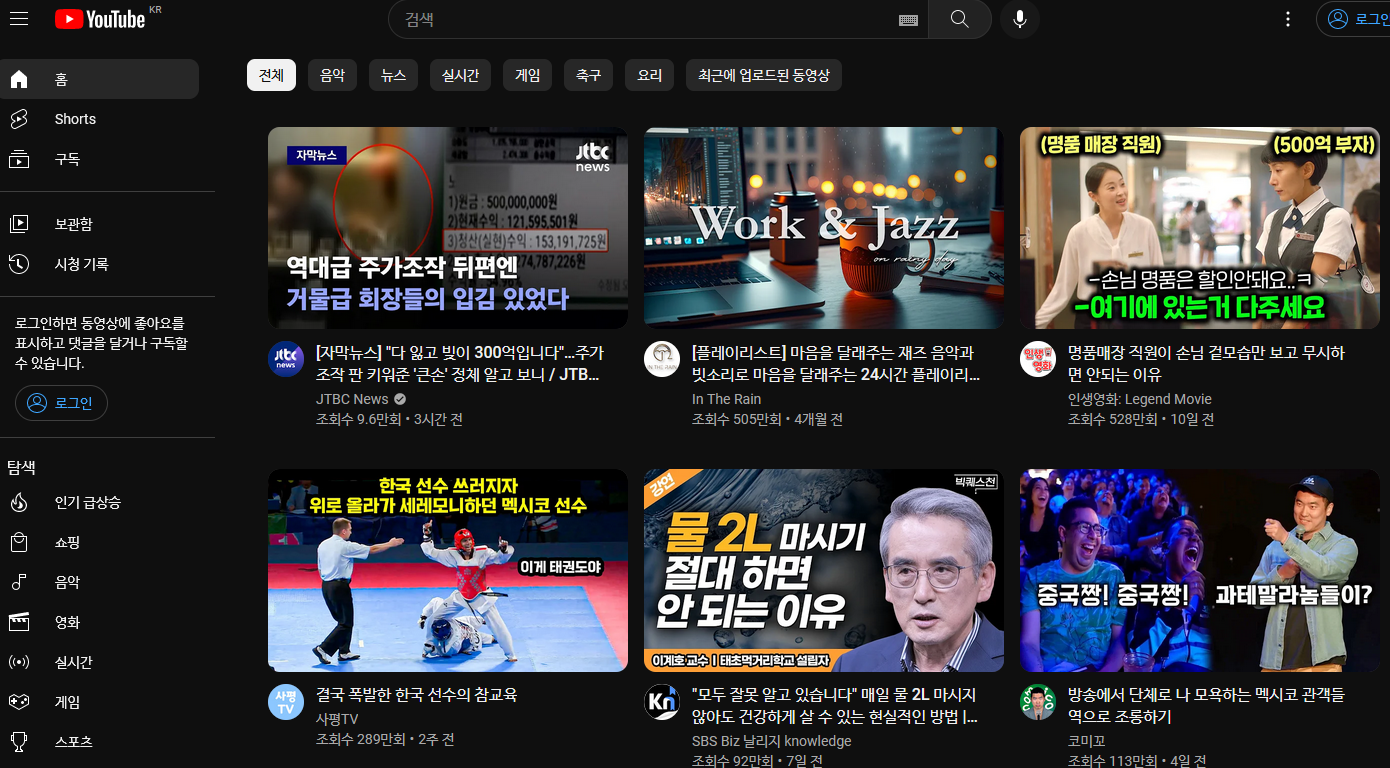

<p style="font-size:16px">이 페이지가 Youtube 홈 화면입니다.<br>
이 화면 에서 나타난 하나의 영상를 골라봤습니다.
</p>


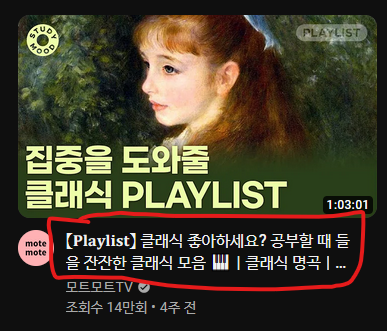

<p style="font-size:16px">이 사진에서 `【𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭】 클래식 좋아하세요? 공부할 때 들을 잔잔한 클래식 모음 🎹ㅣ클래식 명곡ㅣ𝗺𝗼𝘁𝗲𝗺𝗼𝘁𝗲` 이 제목 `a` 태그의 데이터를 보겠습니다.</p>

<p style="font-size:16px">`yt-formatted-string`라는 태그로 되어 있는데 이 안에 `aria-label` 이라는 attribute가 존재합니다.</p>
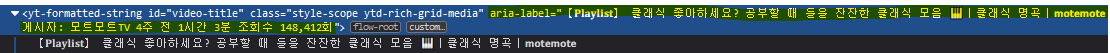

> 📢 **<span style="color:yellow">사진 속 형광색을 주목해주세요!**</span> <br> 제목, 채널명, 게시시간-현재시간, 조회수 순으로 `string`이 Concatenate 되어 있습니다. 



<p style="font-size:16px">본 코드에서는 다음과 같이 aria-label 데이터를 가져옵니다.</p>

#### Code의 역할
1. 브라우저 driver를 실행하여 youtube 홈 화면으로 이동합니다.
2. `aria-label`이 있는 태그를 모두 검색하는 `search_elements()` 함수를 실행합니다.
3. `search_elements()` 함수에서 매개변수로 전달받은 `wait_second`, `loopCount` 값은 `wait_second` 만큼 기다린 다음에 웹 페이지를 맨 아래로 스크롤을 내려 새로운 데이터를 서버로 부터 받아옵니다.
> 💡 교수님이 언급하신 <span style="color:red">**외부 자바스크립트 허용**</span>이 3번의 맨 아래로 스크롤 하는 자바스크립트를 실행하는 것을 의미하지 않는가라는 추측이 됩니다.
4. 이라한 과정을 `loopCount` 만큼 반복합니다.
5. `3`번에서 얻은 결과를 `result` 라는 변수로 전달하게 됩니다.

<p style="font-size:16px">바로 아래의 `Code Automation` 코드에서는 데이터를 가져오고, 저장하는 역할만 합니다.<br>
이 다음의 코드(`aria-label 데이터 전처리 Code`)에서 string으로 가져온 `aria-label`를 `Tokenization`을 통하여 데이터 전처리를 진행합니다.<br>
이 코드를 활용하고 싶다면 70번째 줄 근처에 위치한</p>

```python
############################################################
# Setting
############################################################
```
<p style="font-size:16px">주석 아래의 값들을 조절하시면 됩니다.</p>

<p style="font-size:16px; color:gray">-끝-</p>

In [26]:
############################################################
# Package import
############################################################

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options

from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time


############################################################
# fucntions
############################################################


def create_driver(browser_path, driver_path, website_url):
    '''Create Driver'''
    options = Options()
    options.binary_location = browser_path
    driver = webdriver.Firefox(executable_path=driver_path, options=options)
    driver.get(website_url)
    
    return driver;

def search_elements(driver, type, name, wait_second, loopCount=1):
    '''Search Tag element.

        driver : create_driver() object
        type : selenium.webdriver.common.by object
        name : element type's name / e.g. if <a class="link"> exist in DOM and type is class name, name argument will check between class name and name argument value.
        wait_second : waiting time.
        loopCount : default = 1. => driver will scroll down once.
        
        +) driver will take a time to search element => Time = wait_secound * loopCount
    '''


    for _ in range(loopCount):
        # driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        ##############################################################
        # DOM 의 구조를 보시고 아래 스크립트를 수정해야 합니다. (맨 마지막까지 스크롤 내리기)
        ##############################################################
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        
        time.sleep(wait_second) # wait_second 만큼 대기
    
    # create wait object
    wait = WebDriverWait(driver, wait_second)
    # after wait_second, find element
    elements = wait.until(EC.presence_of_all_elements_located((type, name)))


    # check element
    # element_size = len(elements)
    # if element_size != 0:
    #     print(f'element\'s size : {element_size}'); # print element list length
    # else:
    #     print("element isn't Exist.");
    
    return elements;


############################################################
# Setting
############################################################

# browser path : 웹 브라우저 위치
# e.g.) browser_path = r'C:\Program Files\Mozilla Firefox\firefox.exe'
browser_path = r'C:\Program Files\Mozilla Firefox\firefox.exe'

# driver path : Selenium 브라우저 Driver 위치
# e.g.) driver_path = r'C:/Users/lg495/Downloads/geckodriver.exe'
driver_path = r'C:/Users/lg495/Downloads/geckodriver.exe'

# Website url : 크롤링할 웹사이트 URL
# e.g.) website_url = 'https://www.naver.com/'
website_url = 'https://www.youtube.com/'

# waiting second : 웹페이지 로딩이 완료될 때까지 기다리는 시간.
# e.g.) wait_second = 10; => 10초
wait_second = 10;

# element type
type = By.ID;

# element name
element_name = 'video-title';

# loop cunt
loop_count = 5;


############################################################
# essential process
############################################################

driver = create_driver(browser_path, driver_path, website_url)


############################################################
# custom Programming
############################################################

elements = search_elements(driver, type, element_name, wait_second, loop_count)

result = []
for element in elements:
    # result.append(element.get_attribute('title'))
    # result.append(element.text);
    result.append(element.get_attribute('aria-label'))

# driver close
driver.quit()


print(f"{len(result)} found.")
print("Complete.")

C:\Users\lg495\AppData\Local\Temp\ipykernel_9084\2485619892.py:24: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=driver_path, options=options)


136 found.
Complete.


## aria-label 데이터 전처리 Code

`aria-label attribute` <span style="font-size:16px">데이터는 다음과 같은 값을 가지고 있습니다.</span>

`●4월 28일 금요일 [LIVE] - 뉴스(전민기,김종대,변희재),사랑(김기혁,신기루,유다연,김소희),시네마(전찬일,라이너,최광희,거의없다) 게시자: [팟빵] 매불쇼 조회수 63,671회`

<p style="font-size:16px">위 `string`을 `title` 제목, `channel_name` 채널명, `video_length` 영상 길이, `view_count` 조회수로 분리하는 코드입니다.</p>

In [24]:
def split_yt_info(elements):
    
    title = []
    channel_name = []
    video_length = []
    view_count = []

    index = 0

    print("yt info split process".center(50, "-"))
    print('start.'); print()

    for element in elements:

        if element is not None:
            
            print("id : ", index)
            print("Before:", element)

            split_word = "게시자:"
            title_info = element.split(split_word)
            # 홍구 : 격투기경기도 이겼고 이제 누가 나를 이길수 있겠!! ... 어라?  //   발스타홍구 1시간 전 20분 조회수 41,248회

            title_raw = title_info[0] # 홍구 : 격투기경기도 이겼고 이제 누가 나를 이길수 있겠!! ... 어라?  
            info = title_info[1] # 발스타홍구 1시간 전 20분 조회수 41,248회

            split_word = "조회수"
            channel_length_view = info.split(split_word)
            # 발스타홍구 1시간 전 20분 // 41,248회


            if len(channel_length_view) != 2:
                continue
            view = channel_length_view[1]
            channel_length = channel_length_view[0]


            split_word = '전'
            if channel_length.find(split_word) != -1:
                channel = channel_length.split(split_word)
            else:
                channel = [channel_length, None]
            # 발스타홍구 1시간 // 20분

            channel_name_raw = channel[0]
            # 발스타홍구 1시간
            # print(index, channel_name_raw)
            if channel_name_raw.find("스트리밍 시간:") != -1:
                channel_name_raw = channel_name_raw.split("스트리밍 시간:")
                #  KBS News // 2일 
                channel_name_verified = channel_name_raw[0]
                channel_name.append(channel_name_verified.strip())
                print("channel_name :", channel_name_verified.strip())
            else:
                # 굥욷 12시간 
                # 만약, 공백으로 split된 word 중에 first index가 숫자라면,그 word는 time이다.
                split_channel_name = channel_name_raw.split()
                flag = False;
                i = '';
                for i in split_channel_name:
                    if i[0].isdigit() == True:
                        flag = True
                        break

                if flag == True:
                    #  = split_channel_name.split(i)[0]
                    # print('i : ', i)
                    # print("Before : ", split_channel_name)
                    split_channel_name.remove(i)
                    # print("After : ", split_channel_name)
                    joined_name = ' '.join(split_channel_name)
                    # print("result : ", joined_name)
                    
                    # 굥욷 //  2시간 
                    channel_name.append(joined_name.strip())
                    print("channel_name : ", joined_name.strip())
                else:
                    channel_name.append(None)

            length = channel[1]

            # title append
            title.append(title_raw.strip())
            print("title : ", title_raw.strip())

            # video length append
            if length is not None:
                video_length.append(length.strip())
                print("video_length : ", length.strip())
            else:
                video_length.append(length)
                print("video_length : ", length)
            
            # view count append
            view_count.append(view.strip())
            print("view_count : ", view.strip())

            print(f"After : title = {title[index]}\n    \tchannel_name = {channel_name[index]}\n    \tvideo_length = {video_length[index]}\n    \tview_count = {view_count[index]}")
            print(".\n.")

            index += 1


    return title, channel_name, video_length, view_count


title, channel_name, video_length, view_count = split_yt_info(result)

print("fin".center(50, "="))
print('Complete.')

--------------yt info split process---------------
start.

id :  0
Before: ●4월 28일 금요일 [LIVE] - 뉴스(전민기,김종대,변희재),사랑(김기혁,신기루,유다연,김소희),시네마(전찬일,라이너,최광희,거의없다) 게시자: [팟빵] 매불쇼 조회수 63,671회
title :  ●4월 28일 금요일 [LIVE] - 뉴스(전민기,김종대,변희재),사랑(김기혁,신기루,유다연,김소희),시네마(전찬일,라이너,최광희,거의없다)
video_length :  None
view_count :  63,671회
After : title = ●4월 28일 금요일 [LIVE] - 뉴스(전민기,김종대,변희재),사랑(김기혁,신기루,유다연,김소희),시네마(전찬일,라이너,최광희,거의없다)
    	channel_name = None
    	video_length = None
    	view_count = 63,671회
.
.
id :  1
Before: Playlist 하루 종일 들어도 좋은노래 🎶 BEST 100곡 유튜브 최고에 명곡모음 💝 발라드 유명한 곡들 🌹 일할때 듣기좋은 발라드 추천 광고없는 노래모음 게시자: 발라드 명곡  2개월 전 2시간 37분 조회수 1,244,430회
channel_name :  발라드 명곡
title :  Playlist 하루 종일 들어도 좋은노래 🎶 BEST 100곡 유튜브 최고에 명곡모음 💝 발라드 유명한 곡들 🌹 일할때 듣기좋은 발라드 추천 광고없는 노래모음
video_length :  2시간 37분
view_count :  1,244,430회
After : title = Playlist 하루 종일 들어도 좋은노래 🎶 BEST 100곡 유튜브 최고에 명곡모음 💝 발라드 유명한 곡들 🌹 일할때 듣기좋은 발라드 추천 광고없는 노래모음
    	channel_name = 발라드 명곡
    	video_length = 2시간 37분
    	view_count = 1,244,430회
.
.
i

## CSV Export Code

<p style="font-size:16px">`aria-label 데이터 전처리 Code`에서 분리된 title, channel_name, video_length, view_count 라는 Column 명으로 DataFrame을 생성하고 CSV로 추출합니다.<p>

* <p style="color:lightgreen">한글이 깨지는 현상으로 `encoding='utf-8-sig'` 매개변수를 추가하였습니다.</p>

In [25]:
import pandas as pd
from pathlib import Path 

df = pd.DataFrame({'title': title,
                    'channel_name': channel_name,
                    'video_length': video_length,
                    'view_count' : view_count
                })

file_name = 'yt_crawl.csv'

df.to_csv(file_name, encoding="utf-8-sig")